> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>**A Data set of movies with some statistical columns described as below:**

popularity : rate of movie popularity

budget : budget invested in the movie

revenue : revenue of movie

original_title : movie title

cast : actors of the movie

director : name of movie director

runtime : running duration in minute

genres : category of the movie

production_companies : companies the movie produced by

vote_count : number of votes

vote_average : average vote score

release_year : year movie was released
### Question(s) for Analysis
>**Who is the most participating actor?**

>**What is the share of each genre of the movies?**

>**What is the profit?**

>**What's the expected runtime of a movie?** 

>**Does this industry grow?**

>**Does this industry grow?**

>**Does the number of voters affect the average vote?**

>**Will the movie popularity increase if we increase the Budget???**

>**Do Popular movies always get high votes??**

>**What is the most successful genre??**

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.testing import assert_frame_equal
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas

    100% |████████████████████████████████| 9.5MB 3.5MB/s eta 0:00:01    77% |████████████████████████▊       | 7.3MB 27.4MB/s eta 0:00:01    91% |█████████████████████████████▍  | 8.7MB 28.3MB/s eta 0:00:01
    100% |████████████████████████████████| 256kB 20.3MB/s ta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.8MB/s eta 0:00:01   34% |███████████                     | 4.6MB 26.1MB/s eta 0:00:01    43% |██████████████                  | 5.9MB 25.0MB/s eta 0:00:01    89% |████████████████████████████▌   | 11.9MB 26.8MB/s eta 0:00:01    98% |███████████████████████████████▌| 13.2MB 26.9MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: python-dateutil 2.6.1
    Uninstalling python-dateutil-2.6.1:
      Successfully uninstalled python-dateutil-2.6.1
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing inst

In [42]:
!pip install seaborn --upgrade

    100% |████████████████████████████████| 296kB 15.7MB/s ta 0:00:01
    100% |████████████████████████████████| 11.5MB 3.4MB/s eta 0:00:01   12% |████                            | 1.4MB 27.2MB/s eta 0:00:01    37% |████████████                    | 4.3MB 28.1MB/s eta 0:00:01    84% |███████████████████████████     | 9.7MB 27.3MB/s eta 0:00:01
    100% |████████████████████████████████| 49.4MB 809kB/s eta 0:00:01  0% |                                | 163kB 27.6MB/s eta 0:00:02    8% |██▊                             | 4.1MB 19.9MB/s eta 0:00:03    23% |███████▍                        | 11.4MB 24.8MB/s eta 0:00:02    24% |███████▉                        | 12.1MB 26.5MB/s eta 0:00:02    26% |████████▋                       | 13.3MB 18.4MB/s eta 0:00:02    38% |████████████▏                   | 18.8MB 26.1MB/s eta 0:00:02    42% |█████████████▋                  | 21.1MB 17.8MB/s eta 0:00:02    44% |██████████████▎                 | 22.1MB 16.9MB/s eta 0:00:02    46% |██████████████▉     

<a id='wrangling'></a>
## Data Wrangling

> ***Exploring Data and checking it's types and getting info about it***


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning
> ***Deleting the unuseful coloumns***

> ***Dropping the null values***

> ***Dropping non-logical values***

> ***Fixing Datatypes***

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [6]:
df.columns.values

array(['id', 'imdb_id', 'popularity', 'budget', 'revenue',
       'original_title', 'cast', 'homepage', 'director', 'tagline',
       'keywords', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype=object)

In [7]:
# Some cloumns aren't necessary for our stats.
#We better delete them
unwanted_columns=['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'budget_adj', 'revenue_adj']
df.drop(unwanted_columns, axis=1, inplace=True)
df.shape

(10866, 12)

In [8]:
#Checking for duplicates
df.duplicated().sum()

1

In [9]:
#Delete duplicated values
df.drop_duplicates(inplace=True)

In [10]:
#Time to check for Nulls
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [11]:
#Deleting Nulls
df.dropna(inplace=True)
df.shape

(9772, 12)

In [12]:
#Checking for Zero Values since we can't have a Zero budget/revenue/runtime movie
print('Number of Zero revenue movies:{}'.format(df.query('revenue == 0').count().sum())),
print('Number of Zero budget movies:{}'.format(df.query('budget==0').count().sum())),
print('Number of Zero runtime movies:{}'.format(df.query('runtime==0').count().sum()))

Number of Zero revenue movies:60264
Number of Zero budget movies:57012
Number of Zero runtime movies:156


In [13]:
#The number of Zero budget movies = that of Zero budget_adj = 71265 we need to check if they are the same rows
print('Number of Zero budget movies:{}'.format(df.query('budget==0').count().sum()))

Number of Zero budget movies:57012


In [14]:
df = df[df.runtime != 0]
df = df[df.budget != 0]
df = df[df.revenue != 0]
df.shape

(3805, 12)

In [15]:
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

In [16]:
#To check if there is a movie with a non-logical release year
df.release_year.min(), df.release_year.max()

(1960, 2015)

In [17]:
#Converting the release date datatype
# df.release_date = df.release_date.astype('datetime64[ns]')

In [18]:
#END OF CLEANING

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Who is the most participating actor?)

In [19]:
#Check the cast column
df.cast.head(2)

0    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
Name: cast, dtype: object

In [20]:
df.cast[0]

"Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson"

In [21]:
#Spliting the string to see how does the record look like
df.cast.str.split('|')[0]

['Chris Pratt',
 'Bryce Dallas Howard',
 'Irrfan Khan',
 "Vincent D'Onofrio",
 'Nick Robinson']

In [22]:
type(df.cast.str.split('|').any())

list

In [23]:
len(df.cast.str.split('|').any())


5

In [24]:
#It's now obvious that spliting the cast string would return us a list with 5 names
#Splitting it more to have one name only in each cell.
df_actors = df.cast.str.split("|").explode()
df_actors.head()

0            Chris Pratt
0    Bryce Dallas Howard
0            Irrfan Khan
0      Vincent D'Onofrio
0          Nick Robinson
Name: cast, dtype: object

In [25]:
df_actors.shape

(18979,)

## Noticing that we shall use the built-in .explode() method
#### We better define a function which does it all in one go
##### Thus, we can avoid code repetition

In [26]:
#A function which split and explode the columns
def explode_cols(*col_names):
    exploded_dataframe = df.copy()
    for col in col_names:
        exploded_dataframe[col] = df[col].str.split("|")
        exploded_dataframe = exploded_dataframe.explode(col)
    return exploded_dataframe

In [27]:
exploded_df = explode_cols('cast')
exploded_df.cast.head()

0            Chris Pratt
0    Bryce Dallas Howard
0            Irrfan Khan
0      Vincent D'Onofrio
0          Nick Robinson
Name: cast, dtype: object

In [28]:
best_actor = exploded_df.cast.value_counts().head(10)
best_actor

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Sylvester Stallone    34
Brad Pitt             34
Tom Hanks             34
Harrison Ford         34
Name: cast, dtype: int64

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


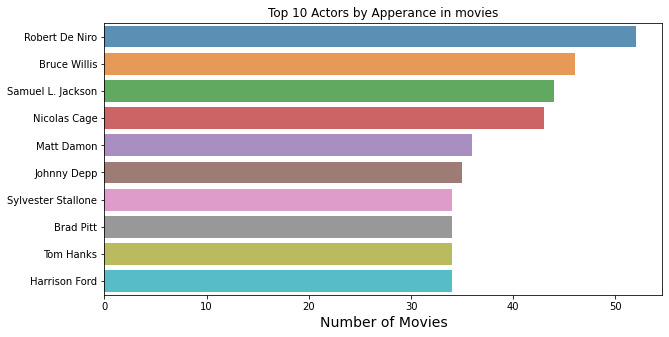

In [29]:
plt.figure(figsize=(10,5))
sns.barplot( best_actor.values, best_actor.index, alpha=0.8)
plt.title('Top 10 Actors by Apperance in movies')
plt.ylabel('', fontsize=14)
plt.xlabel('Number of Movies', fontsize=14)
plt.show()

### Research Question 2  (What is the share of each genre of the movies?)

In [30]:
exploded_df = explode_cols('genres')
exploded_df.genres.head()

0             Action
0          Adventure
0    Science Fiction
0           Thriller
1             Action
Name: genres, dtype: object

In [31]:
pie_genres = exploded_df.genres.value_counts()
pie_genres.head()

Drama        1729
Comedy       1335
Thriller     1194
Action       1076
Adventure     743
Name: genres, dtype: int64

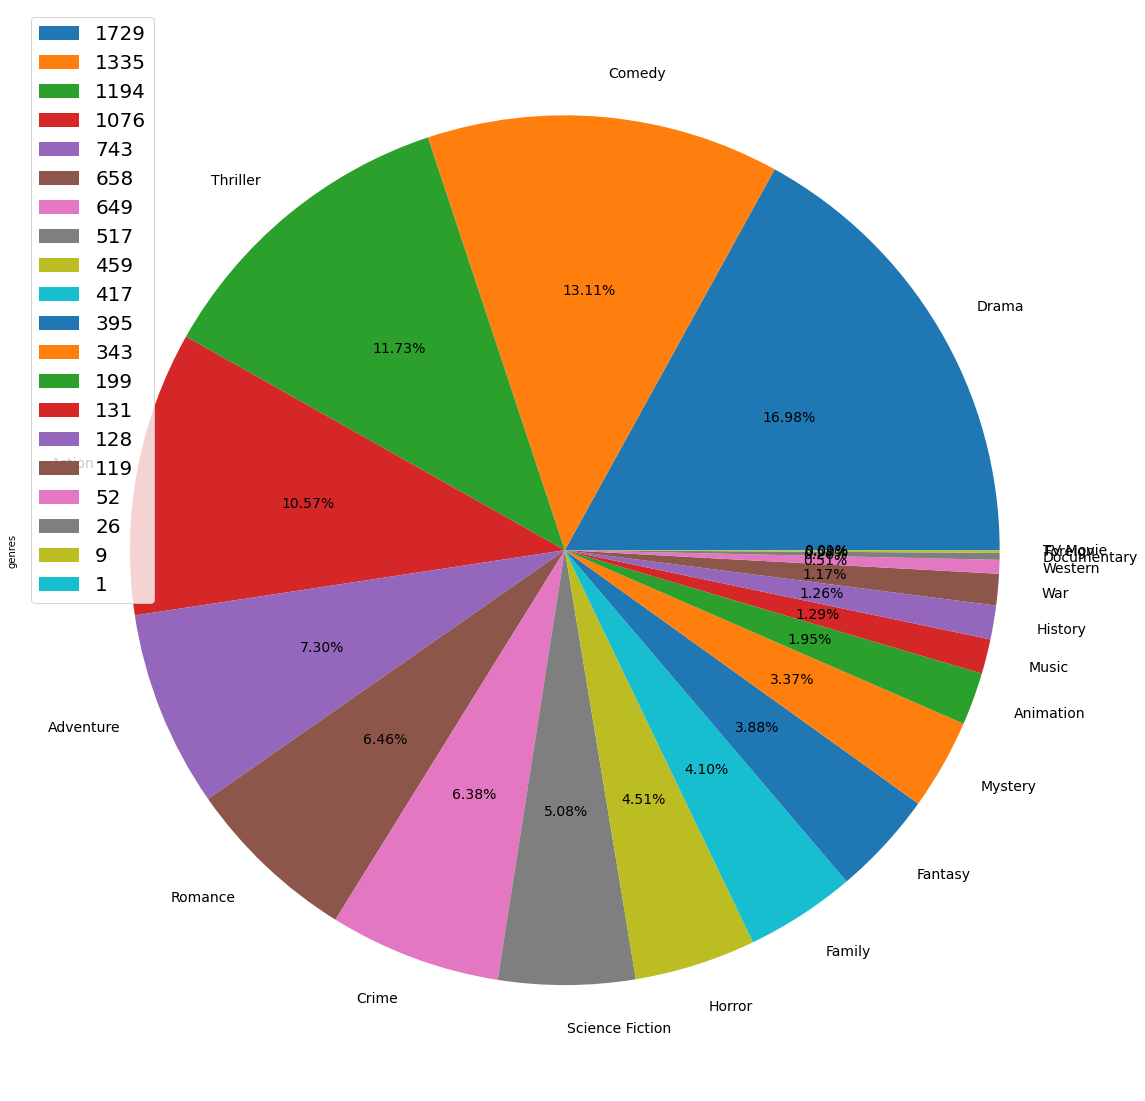

In [32]:
plot = pie_genres.plot.pie(y=pie_genres.values, fontsize=14 ,figsize=(20, 20), autopct='%.2f%%')
plot.legend(pie_genres.values, fontsize=20);

In [33]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 3  (What is the profit?)

In [34]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.budget.head()

0    150000000
1    150000000
2    110000000
3    200000000
4    190000000
Name: budget, dtype: int64

In [35]:
df.revenue.head()

0    1513528810
1     378436354
2     295238201
3    2068178225
4    1506249360
Name: revenue, dtype: int64

In [36]:
area_graph_df = df.groupby('release_year')[['revenue', 'budget']].sum()/10000000000 #dividing by 10^6 so as it turns in Billions
area_graph_df.head()

,revenue,budget
release_year,,
1960,0.012901,0.002081
1961,0.033772,0.003864
1962,0.020633,0.003945
1963,0.017653,0.006111
1964,0.032861,0.003394


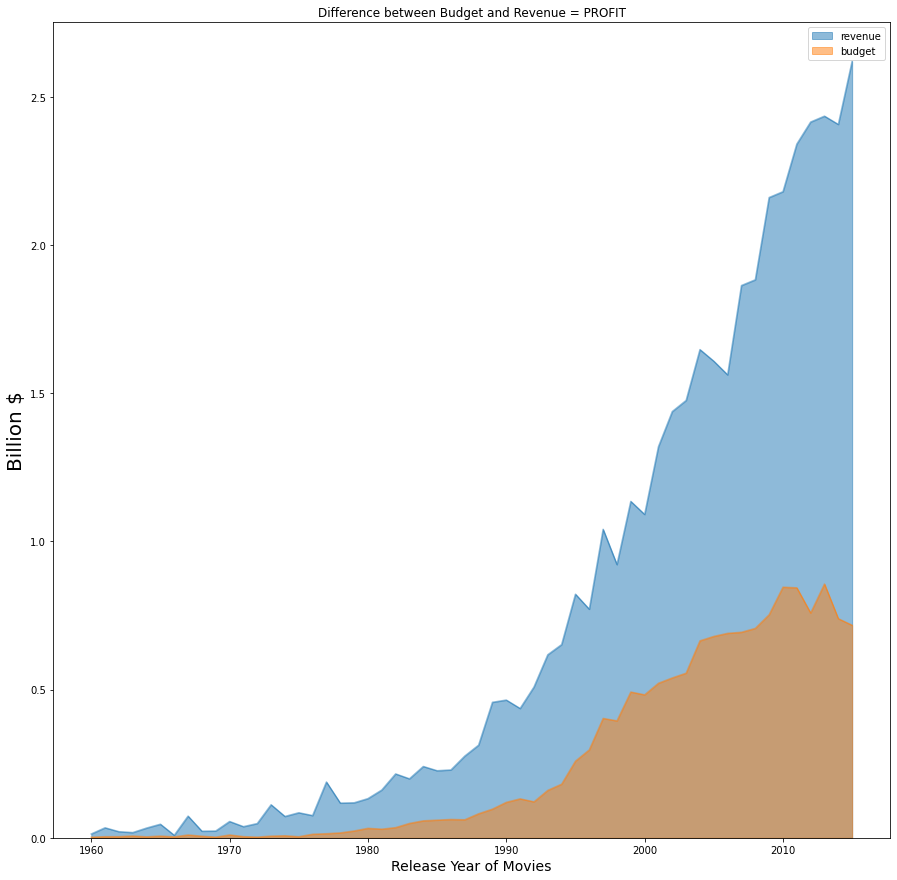

In [37]:
#Ploting in area so as we can deduce the profit visually
ax = area_graph_df.plot.area(stacked=False, figsize=(15,15))
plt.xlabel('Release Year of Movies', fontsize = 14)
#on y-axis
plt.ylabel('Billion $', fontsize = 20)
#title of the line plot
plt.title('Difference between Budget and Revenue = PROFIT');

### Research Question 4  (What's the expected runtime of a movie?)

/opt/conda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 72.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


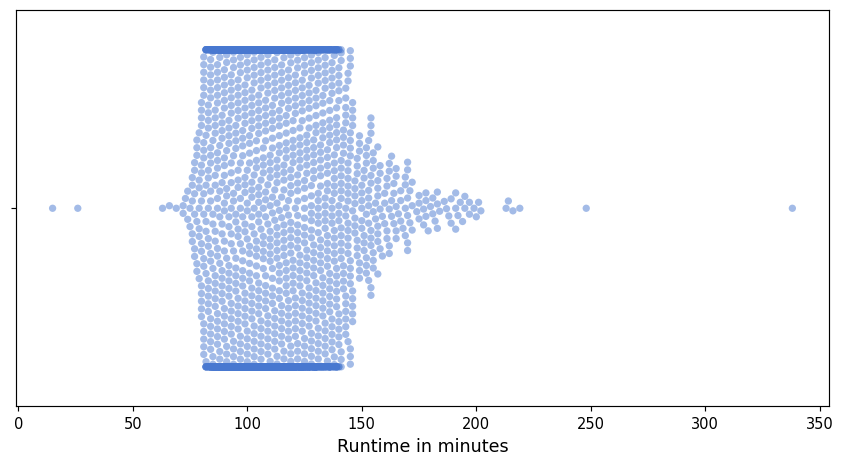

In [38]:
plt.figure(figsize=(10,5), dpi = 105)
#using seaborn
sns.swarmplot(df['runtime'], alpha=.5, palette="muted")
sns.set_theme(style="white")
plt.xlabel('Runtime in minutes', fontsize = 12)
plt.show();

> ***It's obvious that most of movies runtimes range between 80 to 140 minutes in approximate**

### Research Question 5  (Does this industry grow?)

In [39]:
df['profit_in_millions'] = (df['revenue']-df['budget'])/1000000

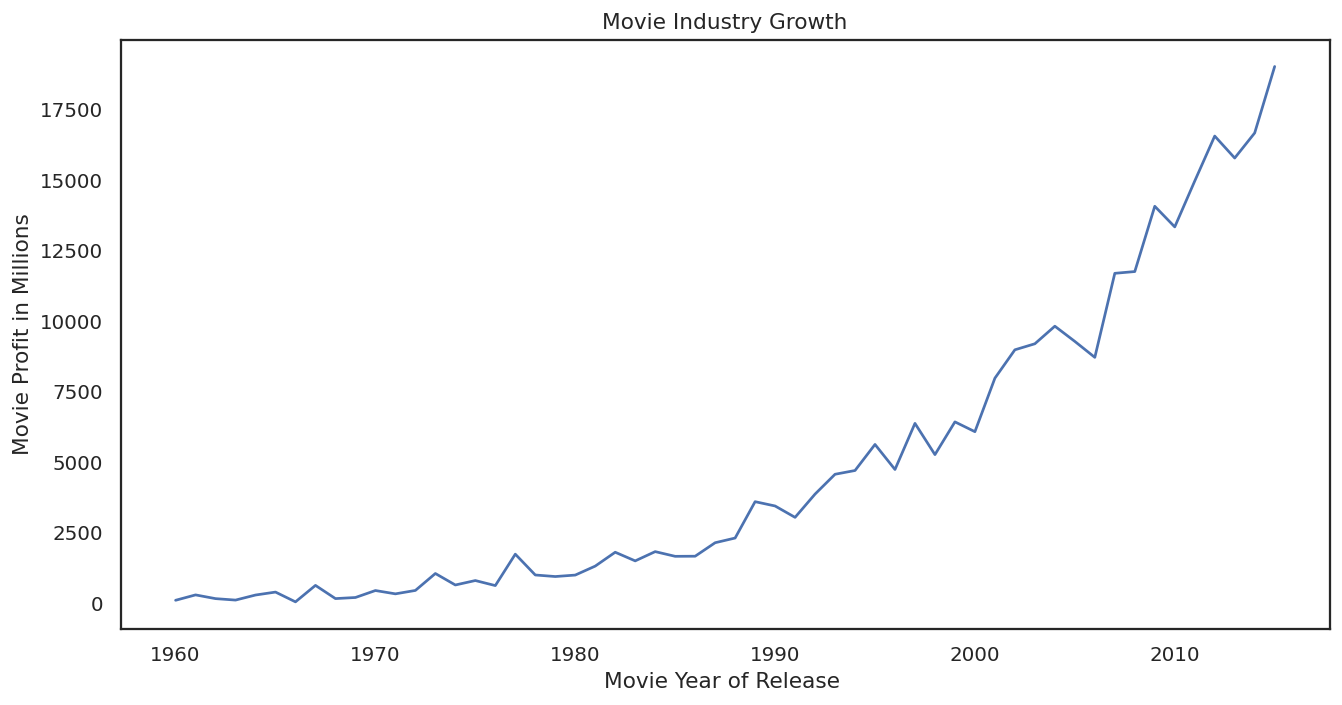

In [40]:
profits_year = df.groupby('release_year')['profit_in_millions'].sum()
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Movie Year of Release ', fontsize = 12)
plt.ylabel('Movie Profit in Millions', fontsize = 12)
#title of the line plot
plt.title('Movie Industry Growth')
plt.plot(profits_year)
plt.show()

### Research Question 6  (What is the distrbution of Movies Votes?)

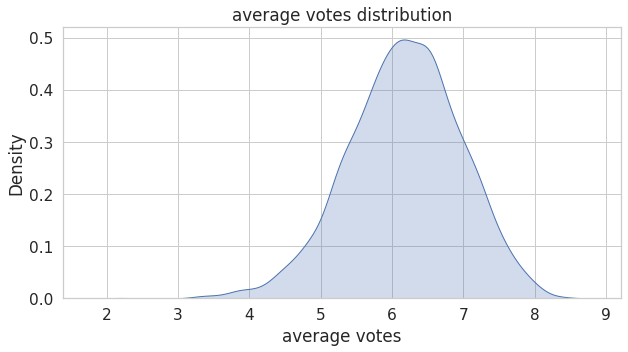

In [41]:
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.4)
vote_df = df[["vote_average"]]
sns.set_style("whitegrid")
ax = sns.kdeplot(vote_df.vote_average, shade=True, color="b")
ax.set(xlabel='average votes', title = 'average votes distribution')
plt.show()

> ***Luckely the votes are normally distributed around the value 6.5**

### Research Question 7  (Does the number of voters affect the average vote?)

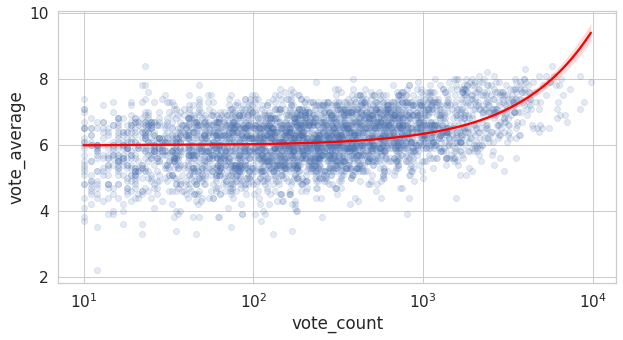

In [42]:
splot = sns.regplot(x="vote_count", y="vote_average", 
                    data=df,
                    scatter_kws={'alpha':0.15},
                    line_kws={'color': 'red'})
splot.set(xscale="log");

> ***Voting average doesn't increase unless the number of voters extremely increase**

### Research Question 8  (Will the movie popularity increase if we increase the Budget???)

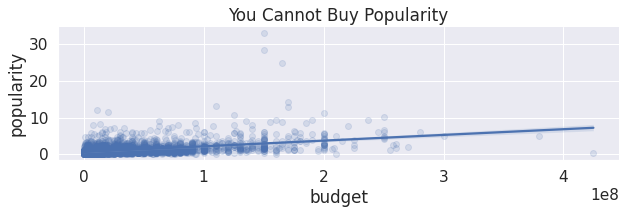

In [43]:
sns.set(rc={'figure.figsize':(100,5)}, font_scale=1.4)
ax = sns.lmplot(y="popularity", x="budget", scatter_kws={'alpha':0.15}, data=df, height=3, aspect=3)
ax.set(xlabel='budget', title = 'You Cannot Buy Popularity')
plt.show()

### Research Question 9  (Did the Popular movies get high votes??)


In [44]:
movies_and_popularity = df[['original_title','popularity']]
movies_and_votes= df[['original_title','vote_average']]
df100 = movies_and_popularity.sort_values(by="popularity", ascending=False).head(100).original_title
df200 = movies_and_votes.sort_values(by="vote_average", ascending=False).head(100).original_title
popularity_vs_votes = pd.merge(df100, df200, how='inner')
print('Only {} % of the top 100 popular movies got the highest votes'.format(len(popularity_vs_votes)/len(df100)*100))

Only 31.0 % of the top 100 popular movies got the highest votes


> **Surprisingly, Popular movies doesn't always get high votes**
In this example Only **31.0 %** of the top 100 popular movies got the highest votes

### Research Question 10 (What is the most successful genre??)


### Assuming that Successful Genre Has the highest (Revenue & Popularity)


In [45]:
#calling our magic function of spliting && explosion
exploded_df = explode_cols('cast', 'genres')

In [46]:
exploded_df.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit_in_millions
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363.52881
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363.52881
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363.52881


In [47]:
df_pop = exploded_df.sort_values(by="popularity", ascending=False).head(100).genres.value_counts()
df_pop

Science Fiction    30
Adventure          30
Action             20
Thriller           15
Drama               5
Name: genres, dtype: int64

In [48]:
df_rev = exploded_df.sort_values(by="revenue", ascending=False).head(100).genres.value_counts()
df_rev

Action             24
Adventure          20
Science Fiction    20
Thriller           13
Fantasy            10
Drama               5
Romance             5
Crime               3
Name: genres, dtype: int64

In [49]:
df_success = (df_pop + df_rev).to_frame()
df_success

,genres
Action,44.0
Adventure,50.0
Crime,NaN
Drama,10.0
Fantasy,NaN
Romance,NaN
Science Fiction,50.0
Thriller,28.0


In [50]:
df_success.query('genres == genres.max()')

,genres
Adventure,50.0
Science Fiction,50.0


> ***The most successfull movie genres are 'Adventure' & 'Since Fiction'**
Since they have got the highest Popularity as well as the highest Revenue

<a id='conclusions'></a>
## Conclusions

> **Movies industry has always been well gowing and the profit ratio is in continous increase**

> **Increasing the number of voters doesn't change the vote result**

> **Increasing movie's budget doesn't make it popular** 

> **Popular movies doesn't always get high votes**

> **Most of movies produced are either 'Drama' or 'Comedy'**.

> **Yet, the most successfull movie genres are 'Adventure' & 'Since Fiction'**.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0